# Welcome to lab_regression! 🏠

One of the coolest parts of data science is **prediction** with **machine learning**. Up until now, we have done a myriad of data analysis given existing data. We have even generated our own data in simulations! Today, using some foundational concepts of machine learning, we will be making predictions based on data!

As you learned in lecture, **linear regression** is a powerful tool that can be used to quantify trends in data. We can use our Python skills to perform **simple linear regression** in this lab! 


A few tips to remember:

- **You are not alone on your journey in learning programming!** You have your lab TA, your CAs, your lab group, and the professors (Prof. Wade and Prof. Karle), who are all here to help you out!
- If you find yourself stuck for more than a few minutes, ask a neighbor or course staff for help! When you are giving help to your neighbor, explain the **idea and approach** to the problem without sharing the answer itself so they can have the same ***ah-hah*** moment!
- We are here to help you! Don't feel embarrassed or shy to ask us for help!

Let's get started!

In [0]:
# Meet your CAs and TA if you haven't already!
# ...first name is enough, we'll know who they are! :)
ta_name = "Eric Wayman"
ca1_name = ""
ca2_name = ""
ca3_name = ""


# Say hello to each other!
# - Groups of 3 are ideal :)
# - However, groups of 2 or 4 are fine too!
#
# Question of the Day (QOTD) to Ask Your Group: "What was your favorite thing about DISCOVERY this semester?"
partner1_name = "Gabby Escutia"
partner1_netid = ""
partner1_DISCOVERYfave = "Labs"

partner2_name = ""
partner2_netid = ""
partner2_DISCOVERYfave = ""

partner3_name = ""
partner3_netid = ""
partner3_DISCOVERYfave = ""

<hr style="color: #DD3403;">

# Part 1: Housing Data EDA

Today, we'll be working with a **housing prices** dataset. This data has the price of many houses/properties alongside various descriptive qualities of those properties (the total square feet, number of bathrooms, number of bedrooms, etc.).

We will use basic **machine learning** techniques in this lab to **predict house prices** with a **linear regression** model.

But before we approach this implementation of **simple linear regression**, let's **familiarize ourselves with the data** by doing some **EDA (Exploratory Data Analysis)**. This will include:
- Viewing a correlation matrix of our data
- Plotting visualizations to visually see relationships in the data

## Puzzle 1.1: Loading In
We've provided you with a `housing.csv` file containing the Housing Dataset. You know the drill. Let's **import the Housing Dataset** in the cell below. Make sure you name your DataFrame `df`. 

In [2]:
import pandas as pd
df = pd.read_csv("housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### 🔬 Test Case Checkpoint 🔬

In [3]:
## == TEST CASES for Puzzle 1.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert ( 'df' in vars() ), "Your DataFrame should be named df."
assert( len(df) == 545 ), "This is not the Housing Dataset we are looking for..."
assert( 'price' in df.columns.to_list() ), "This is not the Housing Dataset we are looking for..." 

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Puzzle 1.2: Correlation Matrix
In lecture, you learned about the correlation coefficient $r$ which measures the **strength of linear association** between two variables ($X$ and $y$).  Find the correlation coefficient matrix for the numerical columns in `df`:

*(If you're not sure how to do this, you can check page 122 of your DISCOVERY notebook.)*

In [4]:
df.corr(numeric_only=True)

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


### ML Vocabulary: Features and Labels

Quick vocabulary lesson! In machine learning, we often organize **instances** in our dataset into **features** and **labels** (in this lab, an **instance** is one row of our DataFrame). 

**Features** are characteristics that describe each **instance** in our dataset. These **features** are the **inputs** fed into machine learning models that will make **predictions**. They are our **independent variables**, or $X$. 

**Labels** are the output or **target** variables we are **trying to predict**. They are our **dependent variables**, or $y$. 

In the context of our housing dataset, the single **label** we are trying to predict is the **price** of a housing property. 

### Analysis: Potential Features

**Q1: Given that our label (what we want to predict) is `price`, what are some *meaningful features* we could use to make a prediction? Use numbers from the correlation matrix to support your answer.**

Our features in this case are the characteristics that factor into the value of a housing property- so aspects like the **area**, the number of **bedrooms/bathrooms**, the **stories**, an whether parking is available helps us predict the price of a housing property. We see in the matrix that the area (r = 0.54) and number of bathrooms (r = 0.52) in a housing property have the strongest linear relationship with price, and are most likely the most meaningful features to help us predict price.

## Puzzle 1.3: Scatter Plot in Predicting Price

The highest $r$ value in the entire dataset is the correlation between `area` and `price` ($r=0.535997$).

Generate a scatter plot from `df` where the dependent variable ($y$) is `price` and independent variable ($X$) is `area`:

Text(0, 0.5, 'Price')

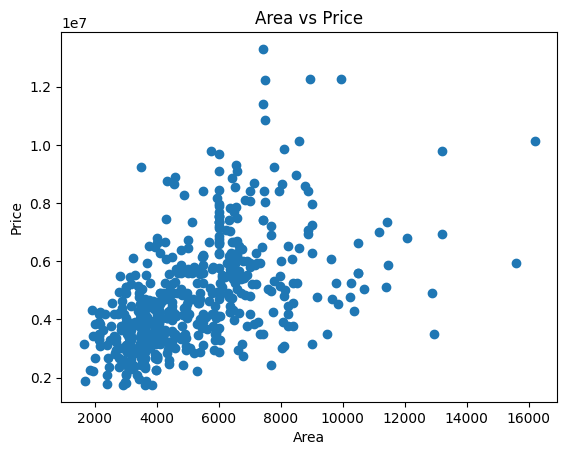

In [11]:
import matplotlib.pyplot as plt
plt.scatter(df.area, df.price)
plt.title("Area vs Price")
plt.xlabel("Area")
plt.ylabel("Price")


<hr style="color: #DD3403;">

# Part 2: Simple Linear Regression

From both the $r$ value and the scatter plot above, you found that **area** and **price** have significant **linear correlation**. 

In lecture, we learned that **linear regression** allows us to predict values based on a "line of best fit". The equation for simple linear regression is:

$$y = (\text{slope}) * X + \text{intercept}$$

For this portion of the lab, we will be using **linear regression** to explore the relationship between **area** (in square feet) and **price** (in dollars) of housing properties in our `df`. 

We can apply formulas we have learned in lecture alongside Python to create a **linear regression model** to predict **housing price** ($y$) given **area** ($X$).

## Puzzle 2.1: Calculating Slope of the Regression Line
In lecture, you learned how to **calculate the slope** of the regression line given your $X$ and $y$ columns of data. The formula is as follows:

$$\text{slope} = r * \frac{SD(y)}{SD(x)}$$

Where $r$ is the correlation coefficient between $X$ and $y$, and $SD$ stands for standard deviation. 

With this, find the slope of the regression line where the dependent variable ($y$) is `price` and the independent variable ($X$) is `area`, storing your answer in the **numeric variable** `slope` below:

*Hint: to select a single cell value from a DataFrame, you can use the `.loc` or `.iloc` functions. Take a look at our guide on the functions to learn how to use them: https://discovery.cs.illinois.edu/guides/DataFrame-Fundamentals/dataframe-loc-vs-iloc/. There are also several other ways of selecting a cell value beside this.* 

In [23]:
sdy = df["price"].std()
sdx = df["area"].std()
slope = df['area'].corr(df['price']) *(sdy/sdx)
slope


np.float64(461.9748942727837)

**Q2: How do you interpret your slope?  What does it mean in terms of the actual units in this problem: `area` (square feet) and `price` (dollars)?**

On average, for every one square foot increase in area, the price of a housing property goes up by $461.97.

## Puzzle 2.2: Calculating Intercept of the Regression Line
You also learned how to calculate the **y-intercept** of the regression line in lecture. The formula is as follows:

$$\text{intercept} = \text{avg}(y) - \text{slope} * \text{avg}(X)$$

Find the **y-intercept** of the regression line between `price` ($y$) and `area` ($X$), storing your result in the numeric variable `intercept` below: 

In [24]:
avgy = df.price.mean()
avgx = df.area.mean()
intercept = avgy - slope*avgx
intercept

np.float64(2387308.482396429)

**Q3: How do you interpret your intercept?  What does it mean in terms of the actual units in this problem: `area` (square feet) and `price` (dollars)?  Does it even make sense in the context of this problem?**

The average value of price for a housing property with 0 square feet is $2387308.48. This does not make sense, as we cannot have a housing property with 0 square feet. This may be an extrapolated predicition, as 0 is most likely **not** in our range of y-values.

### 🔬 Test Case Checkpoint 🔬

In [26]:
## == TEST CASES for Puzzle 2.1, 2.2 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors,/ check you previous cell, make changes, and RE-RUN your code and then this cell.
from math import isclose
assert( isclose(slope, 461.9748942727831) ), "The slope doesn't seem correct."
assert( isclose(intercept, 2387308.4823964317) ), "The intercept doesn't seem correct."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


### Visualizing Your Work: Seaborn 
Now that you have calculated the **slope** and **y-intercept** of your regression line, let's **visualize** it. Run the following code that uses the `seaborn` library to **plot a regression line** on top of a scatter plot of between `area` and `price` - your regression line will be **red**. 

*(See the cell below this Python code if you get an error and need to install seaborn!*)

<Axes: xlabel='area', ylabel='price'>

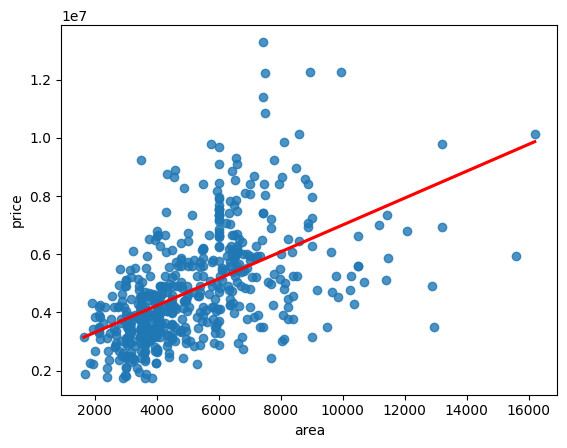

In [27]:
# Run the following code to see the regression line you made!!! :)
import seaborn as sns

# Create scatter plot with regression line:
sns.regplot(data=df, x="area", y="price", ci=None, line_kws={'color':'red'})

If you **do not** have the `seaborn` library installed, try running any one of following commands in your **terminal** until successful installation:
- `python3 -m pip install seaborn`
- `py -m pip install seaborn`
- `pip install seaborn`
- `pip3 install seaborn`

If you are still having import errors trying these commands, **let your lab CAs and TAs know**! They will help you through the installation process. 

### Analysis: Regression Plot

**Q4: Based on the regression line plotted above, would you say it is a "great model", "okay model", or "terrible model" for predicting the housing price? Explain why.**

I would say it's an **okay** model for predicting the housing price, as the points are not concentrated closely near our line of best fit, but rather are in clusters around it. There is a clear linear relationship, but it isn't weak nor strong.

**Q5: For what range of `area` would you be confident predicting price given this model? Explain why.**

I would use this model to predict areas around 2000-6000 square feet, since even though the points are clusted, we see that most points fall closely together in this range. For houses larger than 6000, we see many outliers above and below the line.

<hr style="color: #DD3403;">

# Part 3: Simple Linear Regression with Python
Up until this point of the lab, you have calculated a **simple linear regression model** using your knowledge from **lecture** and **algebra**, but let's take it **one step further and do it with Python**.  We will use Python's `sklearn` library to create a **simple linear regression model** to predict `price` for a given `area`.

## Puzzle 3.1: Build a Linear Regression Model

Create a list named `ind` that contains your independent variable as a string and then create a variable named `dep` that stores your dependent variable as a string:

In [29]:

ind = ["area"]
dep = "price"


### 🔬 Test Case Checkpoint 🔬

In [30]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell.
# - If this cell runs without any error our output, you PASSED all test cases!
# - If this cell results in any errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( 'ind' in vars() and 'dep' in vars() )

assert( dep not in ind ), "Your dependent variable must NOT be an independent variable."
assert( dep in df ), f"{dep} (`dep`) must be a column in df."

assert( len(ind) == 1 ), "There should be one independent variables."
for var in ind:
  assert( var in df ), f"{var} (in `independent_variables`) must be a column in df."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")

🎉 All tests passed! 🎉


## Part 3.2: Running and Evaluating a Model

Create a linear regression model:

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Train (fit) the model with your data:
model=LinearRegression()
model.fit(df[ind],df[dep])

LinearRegression()

## Part 3.3: Predict the Price of a 2,000 sq. ft House

Finally, predict the price of a 2,000 square foot house:

In [32]:
model.predict([[2000]])

/Users/saradabbagh/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3311258.270942])

### Reflection: House Price

**Q6: What is the predicted price of your 2,000 sq. ft house?  Does this match your scatter plot?** (There is no test case for this result, so make sure it makes sense in the context of this data!)

The predicted price of a 2000 sq. ft house is about $3,311,258.27. This is consistent with the scatter plot, since we see the line of best fit predicts a price of 0.3e07 ~3,000,000. So, this does make sense in the context of our data.

<hr style="color: #DD3403;">

# Submission

You're almost done!  All you need to do is to commit your lab to GitHub:

1.  ⚠️ **Make certain to save your work.** ⚠️ To do this, go to **File => Save All**

2.  After you have saved, exit this notebook and follow the Canvas instructions to commit this lab to your Git repository!

3. Your TA will grade your submission and provide you feedback after the lab is due. :)